In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. https://www.kaggle.com/datasets/energyinvestigators/projectile-motion-in-basketball/data

In [5]:
ds_1 = pd.read_excel('basketball_projectile_motion_dataset.xlsx')

In [6]:
ds_1


,mass,velocity,height,gravity,force,distance,kinetic_energy,potential_energy,total_energy,work_done
0,0.474728,7.665153,2.654306,9.8,98.715882,5.731751,13.946224,12.348725,26.294949,565.814853
1,0.466582,5.689494,2.080033,9.8,50.858650,5.894784,7.551717,9.510965,17.062681,299.800745
2,0.435231,7.956215,2.242330,9.8,97.382583,11.519737,13.775348,9.564123,23.339471,1121.821754
3,0.521453,6.573928,2.773679,9.8,68.433871,9.869407,11.267702,14.174175,25.441877,675.401736
4,0.495325,5.261744,2.528686,9.8,50.504520,12.904153,6.856769,12.274705,19.131474,651.718031
...,...,...,...,...,...,...,...,...,...,...
995,0.471889,5.023222,2.940234,9.8,71.216907,11.508835,5.953532,13.597149,19.550681,819.623621
996,0.585342,9.368343,2.692909,9.8,95.784568,6.777983,25.686499,15.447461,41.133959,649.226207
997,0.539731,6.536626,2.867619,9.8,74.896903,5.512395,11.530681,15.167891,26.698571,412.861343
998,0.451435,9.692944,2.366457,9.8,69.941831,11.829616,21.206894,10.469363,31.676258,827.384995


In [7]:
ds_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mass              1000 non-null   float64
 1   velocity          1000 non-null   float64
 2   height            1000 non-null   float64
 3   gravity           1000 non-null   float64
 4   force             1000 non-null   float64
 5   distance          1000 non-null   float64
 6   kinetic_energy    1000 non-null   float64
 7   potential_energy  1000 non-null   float64
 8   total_energy      1000 non-null   float64
 9   work_done         1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


It seems that it doesnt fit our requirement for building the physics model for the projectile, but it can be tthe source of parameters for our synthetic data generators. So I'm ganna analysis this further by statistics.

In [8]:
ds_1.describe()

,mass,velocity,height,gravity,force,distance,kinetic_energy,potential_energy,total_energy,work_done
count,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.501138,7.526258,2.497414,9.8,74.681238,10.048928,14.731190,12.266802,26.997992,750.250683
std,0.057291,1.480857,0.287820,0.0,14.695535,2.897506,5.836294,2.008192,6.527875,265.057854
min,0.400189,5.000789,2.001204,9.8,50.066682,5.013199,5.325888,8.008970,14.125179,270.506902
25%,0.450526,6.267189,2.247859,9.8,61.741646,7.546793,9.644038,10.756334,21.685779,542.875204
50%,0.501273,7.472259,2.489840,9.8,74.121523,10.009647,14.040254,12.146046,26.298278,723.396614
75%,0.551340,8.868292,2.753203,9.8,87.604358,12.684916,19.478220,13.617340,31.702364,925.803564
max,0.599935,9.996676,2.998698,9.8,99.942241,14.998051,29.708470,17.473523,46.197378,1472.959887


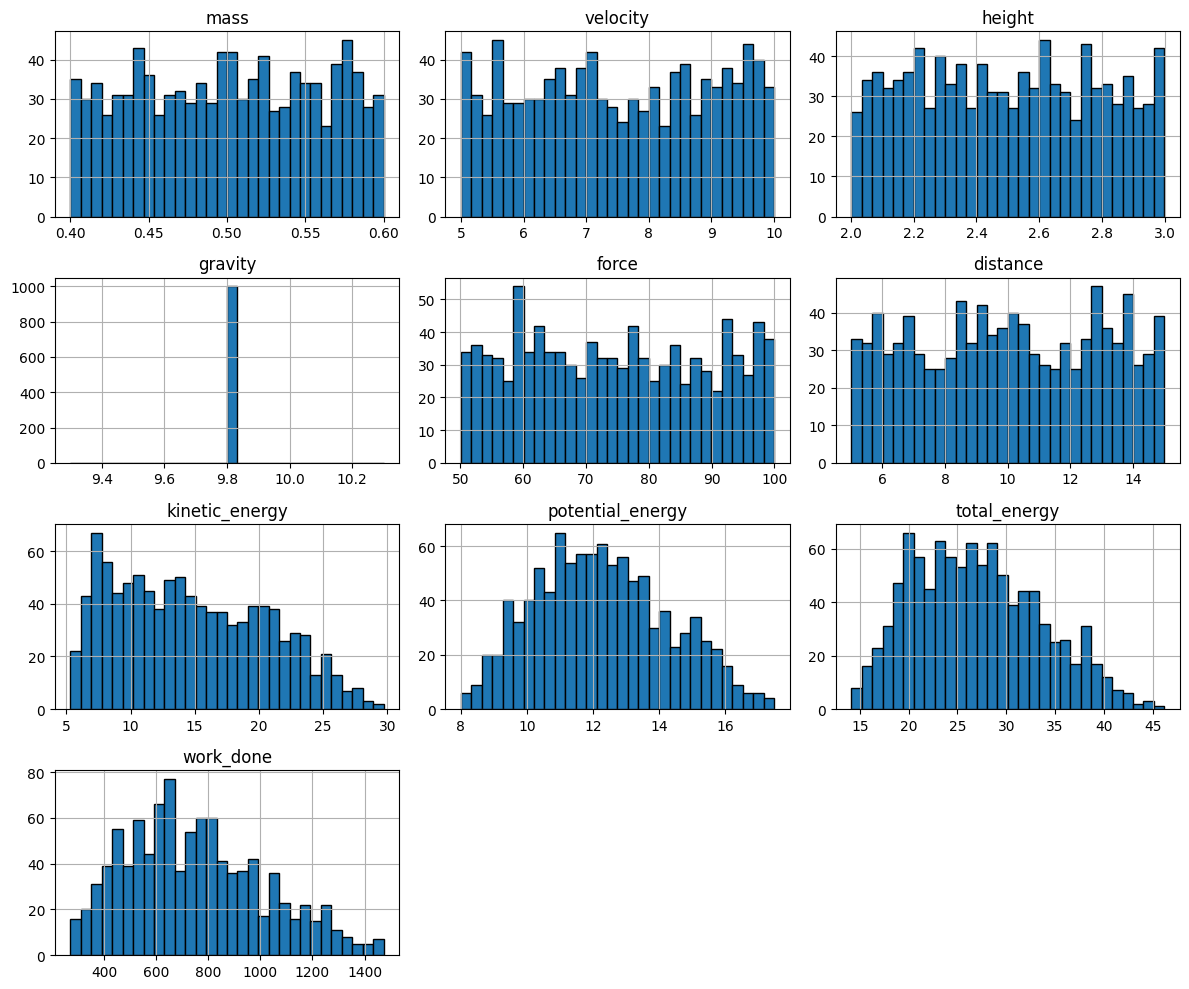

In [9]:
ds_1.hist(
    figsize=(12, 10),
    bins=30,
    edgecolor='black'
)

plt.tight_layout()
plt.show()

it feels like this database is made by synthetics based on physical equations.
Let's explore furthur:

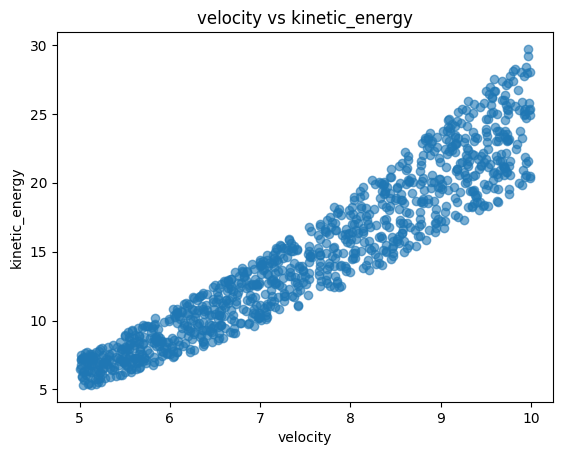

In [10]:
plt.figure()
plt.scatter(ds_1["velocity"], ds_1["kinetic_energy"], alpha=0.6)
plt.xlabel("velocity")
plt.ylabel("kinetic_energy")
plt.title("velocity vs kinetic_energy")
plt.show()

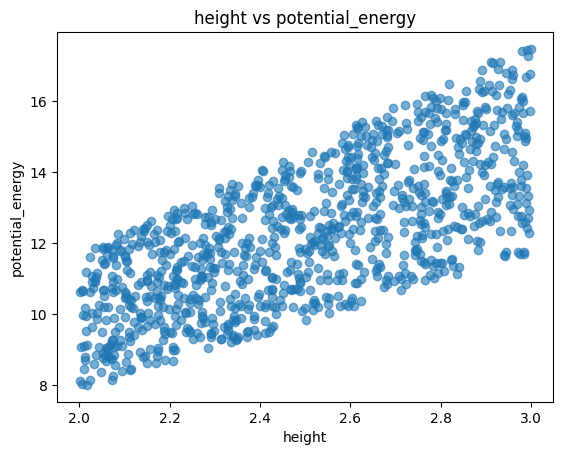

In [11]:
plt.figure()
plt.scatter(ds_1["height"], ds_1["potential_energy"], alpha=0.6)
plt.xlabel("height")
plt.ylabel("potential_energy")
plt.title("height vs potential_energy")
plt.show()

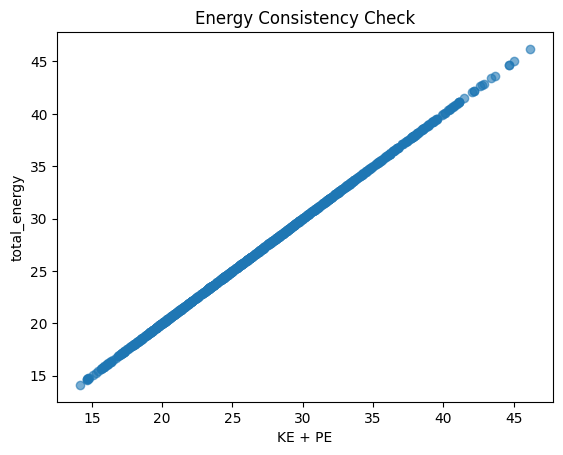

In [12]:
plt.figure()
plt.scatter(
    ds_1["kinetic_energy"] + ds_1["potential_energy"],
    ds_1["total_energy"],
    alpha=0.6
)
plt.xlabel("KE + PE")
plt.ylabel("total_energy")
plt.title("Energy Consistency Check")
plt.show()


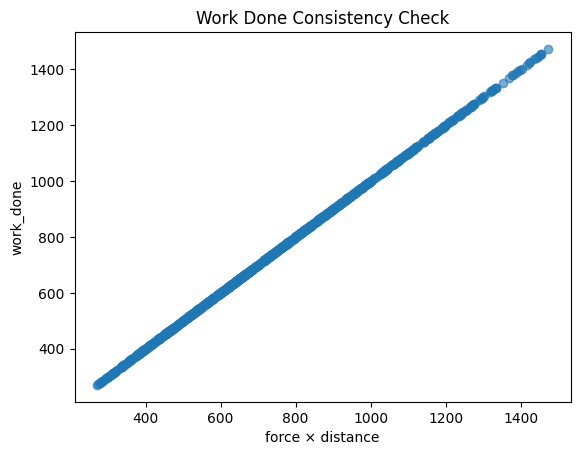

In [13]:
plt.figure()
plt.scatter(
    ds_1["force"] * ds_1["distance"],
    ds_1["work_done"],
    alpha=0.6
)
plt.xlabel("force × distance")
plt.ylabel("work_done")
plt.title("Work Done Consistency Check")
plt.show()


1.The scatter plot of velocity versus kinetic energyy exhibits a strong quadratic relationship with limited dispersion, consistent with the analytical form $KE=1/2mv^2$. The band-like structure suggests controlled variation in mass or gravity rather than measurement noise, indicating that the dataset is synthetically generated based on physical equations.
2.The scatter plot of height versus potential energy exhibits a strong linear relationship with limited dispersion, consistent with the analytical form PE=mgh. The band-like structure suggests controlled variation in mass or gravity rather than measurement noise, indicating that the dataset is synthetically generated based on physical equations.
3&4. The scatter plot of Engergy and work done are both exhibits a perfect strong linear relationships. Indicating the dataset is synthetically generated.

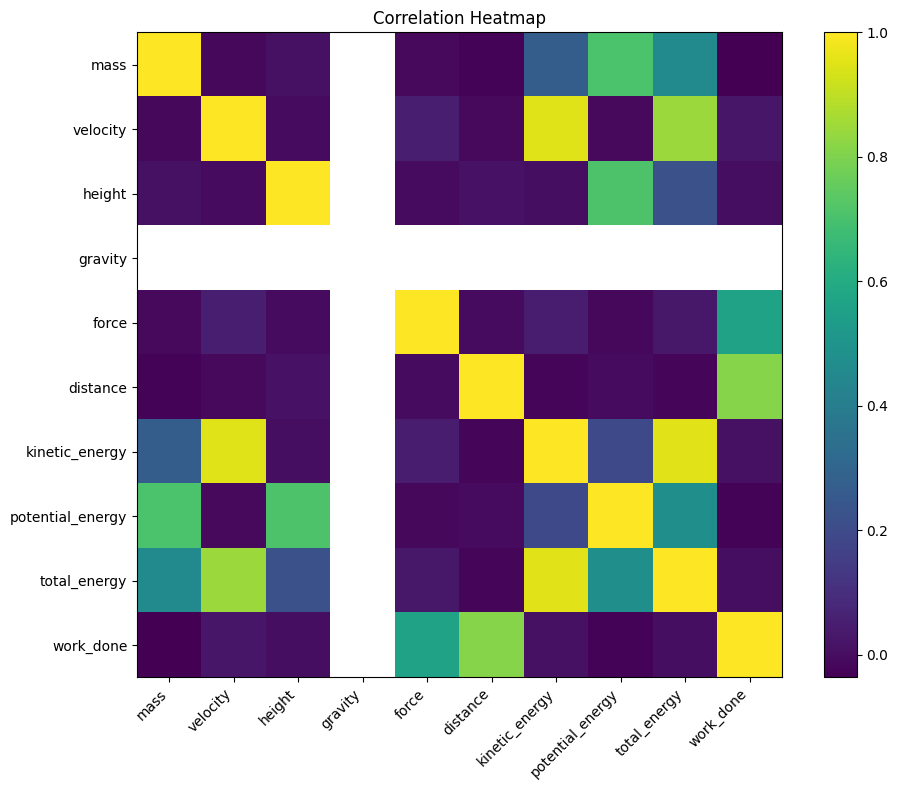

In [14]:
corr = ds_1.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


The correlation heatmap reveals strong multicollinearity among physics-derived variables, particularly between velocity and kinetic energy, height and potential energy, and among all energy-related features. These deterministic relationships indicate that many variables are analytically derived rather than independently measured. As a result, the dataset offers limited capacity for data-driven learning beyond known physical equations and is not suitable for modeling real basketball shot trajectories.

That says https://www.kaggle.com/datasets/energyinvestigators/projectile-motion-in-basketball/data is not the database we need for real world.

2. https://www.kaggle.com/datasets/techbaron13/nba-shots-dataset-2001-present

In [15]:
ds_2 = pd.read_csv('20001031.csv')

In [16]:
ds_2.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,match_id,shotX,shotY,quarter,time_remaining,player,team,made,shot_type,distance,score,opp,status
0,0,0,0,200010310ATL,8.3,20.2,1st quarter,11:29.0,Baron Davis,CHH,False,2-pointer,22,0-2,'CHH',trails
1,1,1,1,200010310ATL,35.9,15.8,1st quarter,10:41.0,Jamal Mashburn,CHH,False,2-pointer,16,0-2,'CHH',trails
2,2,2,2,200010310ATL,24.0,5.0,1st quarter,10:38.0,Baron Davis,CHH,False,2-pointer,0,0-2,'CHH',trails
3,3,3,3,200010310ATL,15.4,5.9,1st quarter,9:36.0,Elden Campbell,CHH,False,2-pointer,9,0-4,'CHH',trails
4,4,4,4,200010310ATL,20.3,25.0,1st quarter,9:18.0,David Wesley,CHH,True,2-pointer,20,2-4,'CHH',trails


In [17]:
ds_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.2    2032 non-null   int64  
 1   Unnamed: 0.1    2032 non-null   int64  
 2   Unnamed: 0      2032 non-null   int64  
 3   match_id        2032 non-null   object 
 4   shotX           2032 non-null   float64
 5   shotY           2032 non-null   float64
 6   quarter         2032 non-null   object 
 7   time_remaining  2032 non-null   object 
 8   player          2032 non-null   object 
 9   team            2032 non-null   object 
 10  made            2032 non-null   bool   
 11  shot_type       2032 non-null   object 
 12  distance        2032 non-null   int64  
 13  score           2032 non-null   object 
 14  opp             2032 non-null   object 
 15  status          2032 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 240.2+ KB


This database is more about the status of shooting and the result of shooting, it may be not the database we need for now. So just skip it.

3. https://www.kaggle.com/datasets/paultimothymooney/nba-player-shooting-motions/data

In [18]:
ds_3 = pd.read_csv("path_detail.csv")

In [19]:
ds_3.head()

,pid,fnm,lnm,hght,t,ddst,cx,cy,cz,cvx,...,cv,cax,cay,caz,ca,rt,dx,dy,dz,d
0,201935,James,Harden,77.0,0.000,25.0,-0.114509,0.168085,3.347305,-7.779792,...,10.145788,-0.697121,0.080510,98.930052,98.932541,-0.379,NaN,NaN,NaN,NaN
1,201935,James,Harden,77.0,0.001,25.0,-0.122287,0.164799,3.353028,-7.777437,...,10.199382,2.354344,0.806486,99.811613,99.842633,-0.379,-0.007777,-0.003286,0.005722,0.010199
2,201935,James,Harden,77.0,0.002,25.0,-0.130059,0.161515,3.358850,-7.772032,...,10.251623,5.405808,1.532461,100.693173,100.849821,-0.379,-0.007772,-0.003284,0.005823,0.010252
3,201935,James,Harden,77.0,0.003,25.0,-0.137822,0.158233,3.364775,-7.763574,...,10.302562,8.457273,2.258436,101.574734,101.951226,-0.379,-0.007764,-0.003282,0.005924,0.010303
4,201935,James,Harden,77.0,0.004,25.0,-0.145574,0.154954,3.370802,-7.752066,...,10.352252,11.508738,2.984411,102.456294,103.143831,-0.379,-0.007752,-0.003279,0.006027,0.010352


In [20]:
ds_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79776 entries, 0 to 79775
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     79776 non-null  int64  
 1   fnm     79776 non-null  object 
 2   lnm     79776 non-null  object 
 3   hght    73027 non-null  float64
 4   t       78574 non-null  float64
 5   ddst    78574 non-null  float64
 6   cx      78574 non-null  float64
 7   cy      78574 non-null  float64
 8   cz      78574 non-null  float64
 9   cvx     78574 non-null  float64
 10  cvy     78574 non-null  float64
 11  cvz     78574 non-null  float64
 12  cv      78574 non-null  float64
 13  cax     78574 non-null  float64
 14  cay     78574 non-null  float64
 15  caz     78574 non-null  float64
 16  ca      78574 non-null  float64
 17  rt      78574 non-null  float64
 18  dx      78387 non-null  float64
 19  dy      78387 non-null  float64
 20  dz      78387 non-null  float64
 21  d       78387 non-null  float64
dty

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown=20, nGraphPerRow=5):
    nunique = df.nunique(dropna=True)

    df = df[[col for col in df.columns
             if 1 < nunique[col] < 50]]

    nCol = df.shape[1]
    nGraphRow = math.ceil(min(nCol, nGraphShown) / nGraphPerRow)

    plt.figure(figsize=(6 * nGraphPerRow, 4 * nGraphRow))

    for i, col in enumerate(df.columns[:nGraphShown]):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        series = df[col].dropna()

        if not np.issubdtype(series.dtype, np.number):
            series.value_counts().plot.bar()
        else:
            series.hist(bins=30)

        plt.title(col)
        plt.ylabel("count")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.select_dtypes(include=[np.number])
    # df = df.dropna(axis=1) # not doing this because here just analysis the correlation, and will clean the data later, so just keep all the columns for now
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [44]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

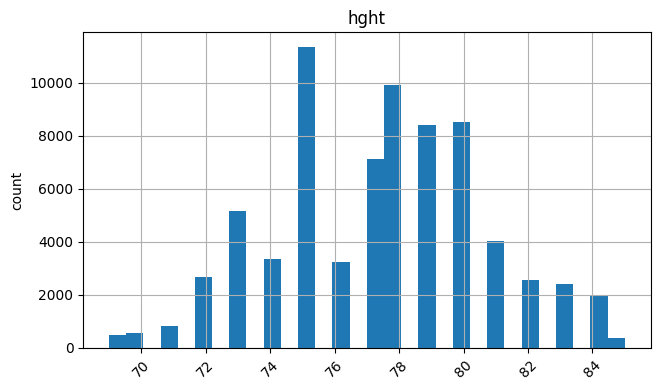

In [23]:
plotPerColumnDistribution(ds_3, nGraphShown=20, nGraphPerRow=5)

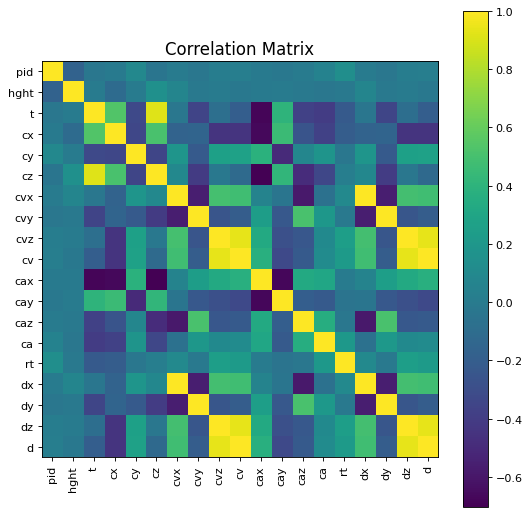

In [41]:
plotCorrelationMatrix(ds_3, 8)

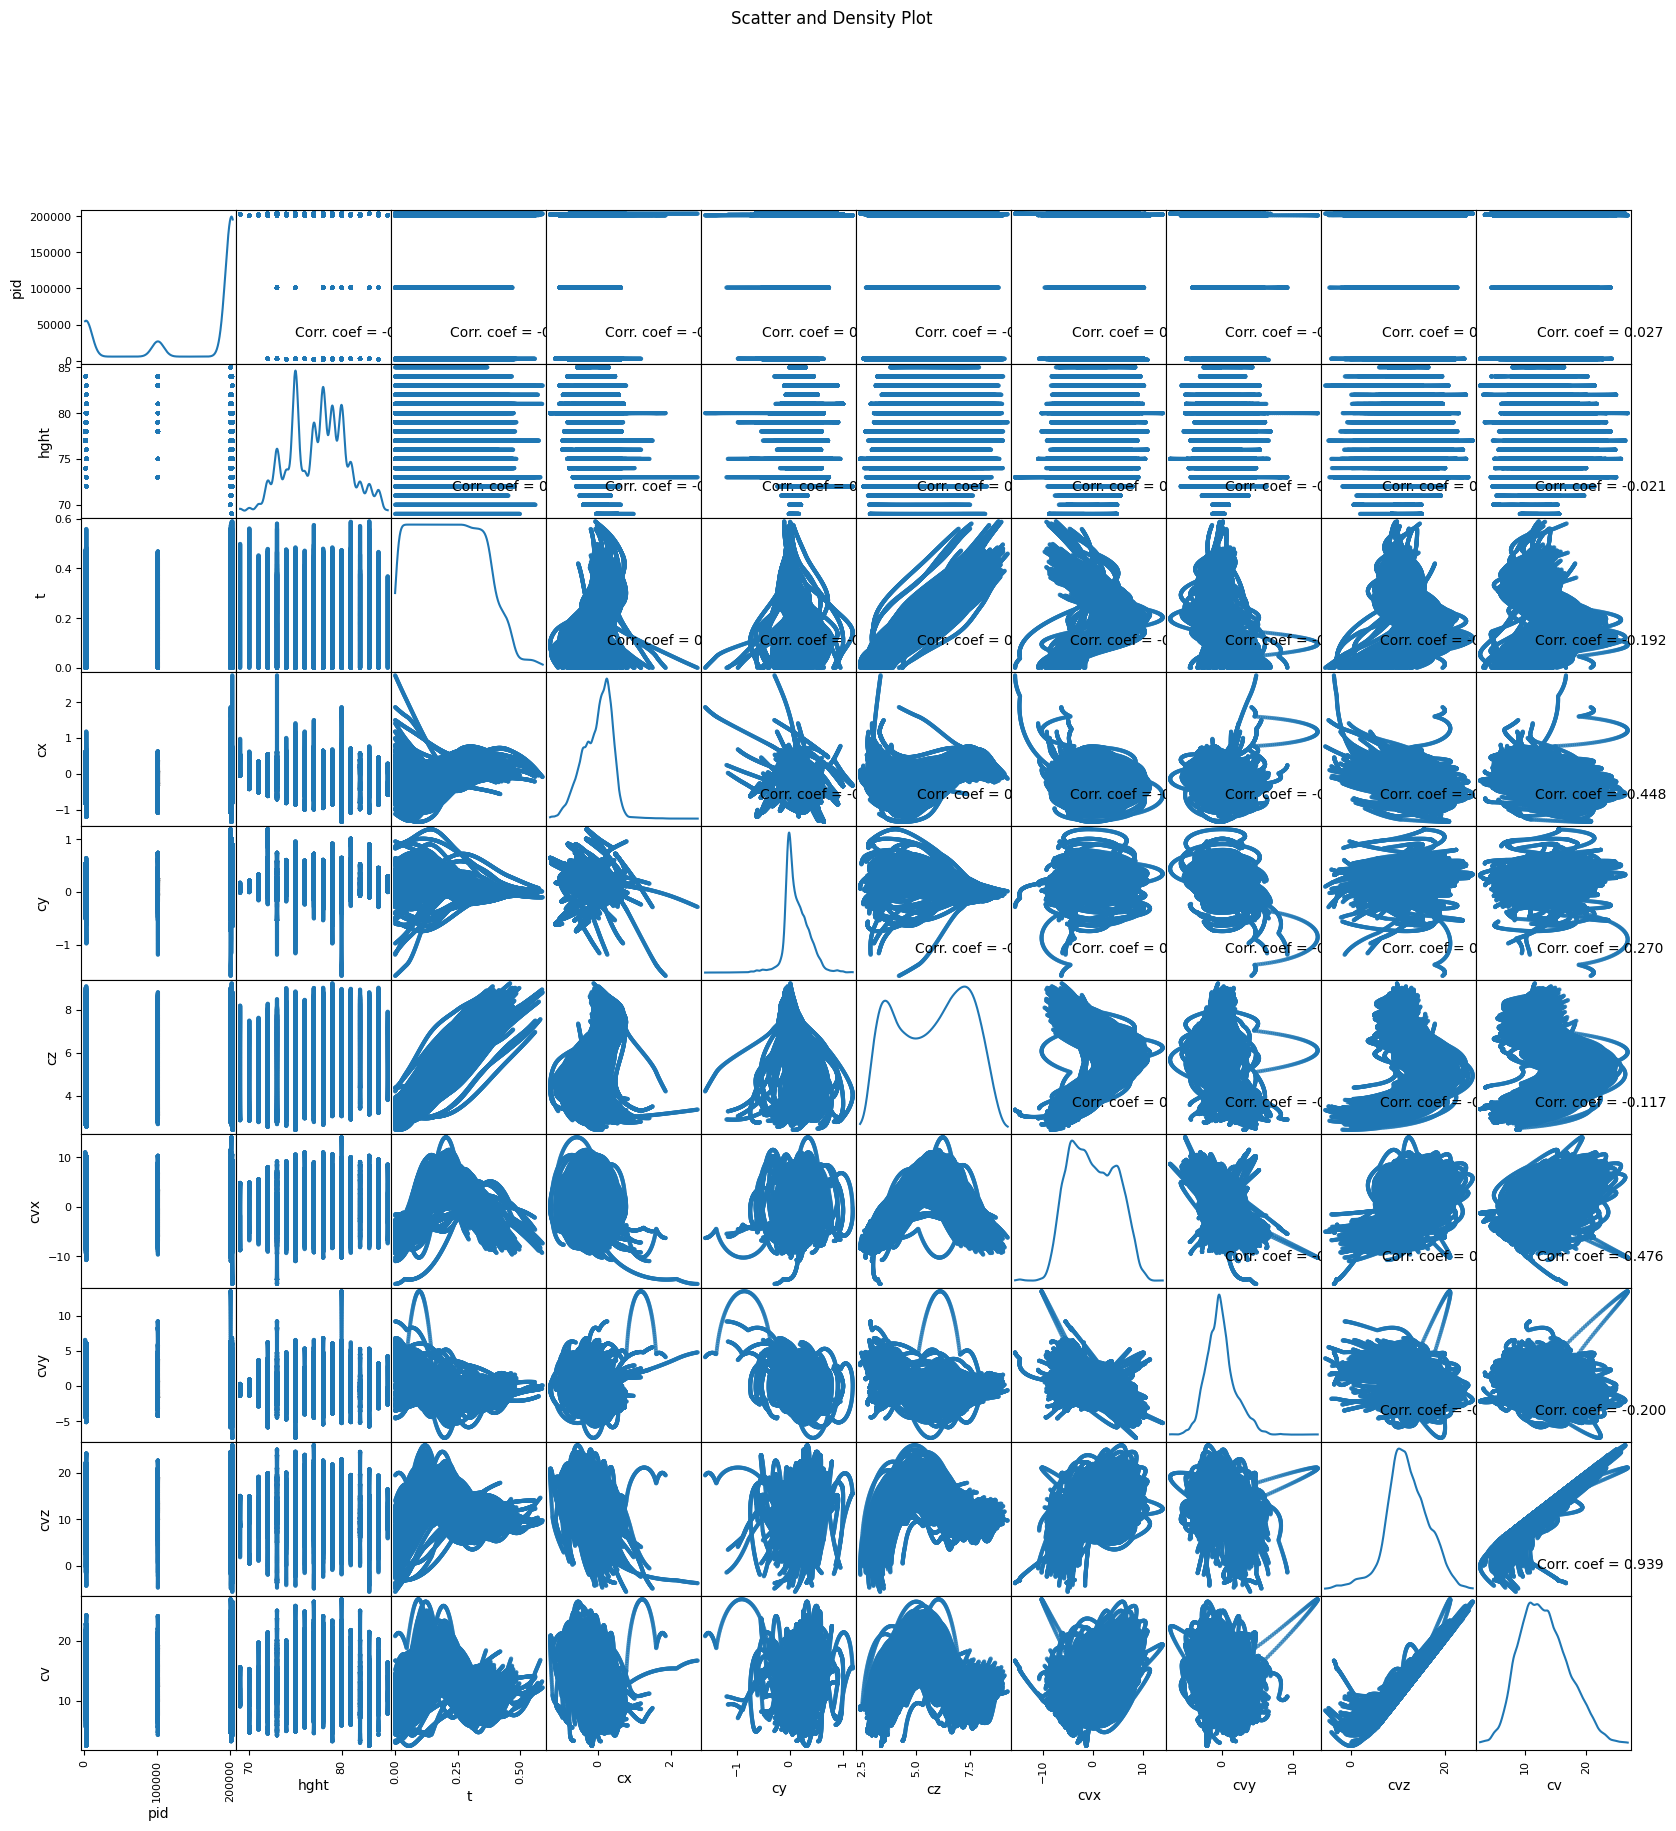

In [47]:
plotScatterMatrix(ds_3, 20, 10)

!!Remember, I didnt do any data cleaning here since this file is just for analysis, so this graph looks really complicated, but I will analysis here:

This visualization shows that the dataset is trajectory-based and physics-constrained, not an i.i.d. sample.

Key Observations

1. Time (t) is discrete
Clear vertical striping indicates t represents discrete timesteps (frames). Many points share the same t, meaning multiple entities are observed simultaneously. Correlations involving t are not meaningful without separating trajectories.

2. Strong physical structure dominates the data
Spatial (cx, cy, cz) and velocity (cvx, cvy, cvz) variables show bounded, non-random shapes caused by court geometry and motion constraints. These are not noise patterns but physical limits.

3. Derived-variable redundancy
cv is almost perfectly correlated with velocity components, indicating it is a derived quantity. Using it together with cvx, cvy, cvz introduces redundancy and potential information leakage.

4. High correlations reflect physics, not discovery
Very strong correlations (e.g., between cz and cvz) are expected from motion dynamics and should not be interpreted as predictive insights.

5. Low Pearson correlation ≠ independence
Many variable pairs show structured, non-linear relationships despite near-zero linear correlation. Pearson correlation alone is insufficient.

6. Missing values are systematic
NaNs appear across columns and are likely caused by tracking or physical conditions, not random errors. Dropping them blindly would remove meaningful information.

Implications for Further Research:
1. Segment data by trajectory or entity before modeling
2. Treat time and height as special (non-standard) variables
3. Avoid naive correlation-based feature selection
4. Handle NaNs deliberately, not via dropna()
5. Prefer physics-aware or trajectory-aware modeling approaches

Realize this is exactly what we want!